Converged at iteration 10
Final Theta: [0.99613347 0.00133954]
Final Cost: 1.3131948455078306e-06


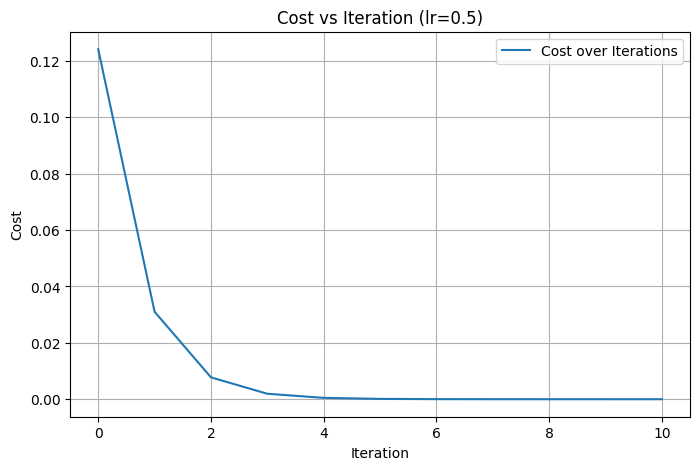

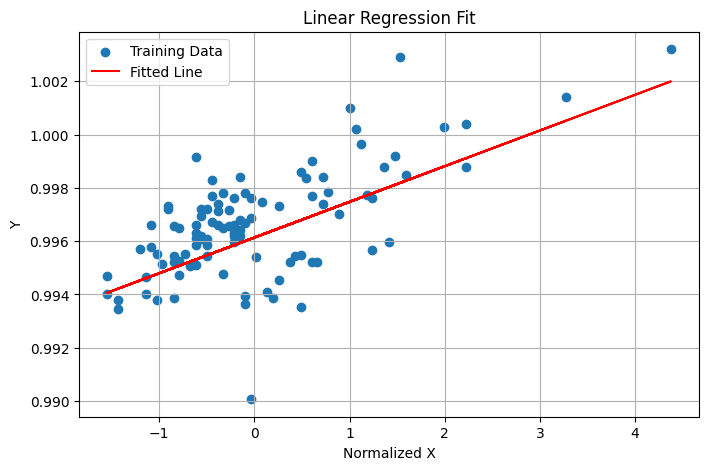

Converged at iteration 10


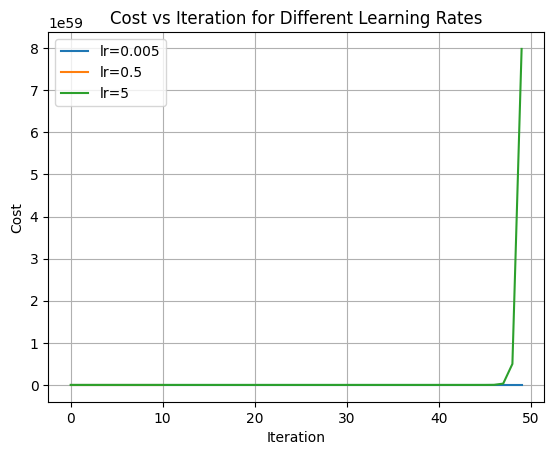

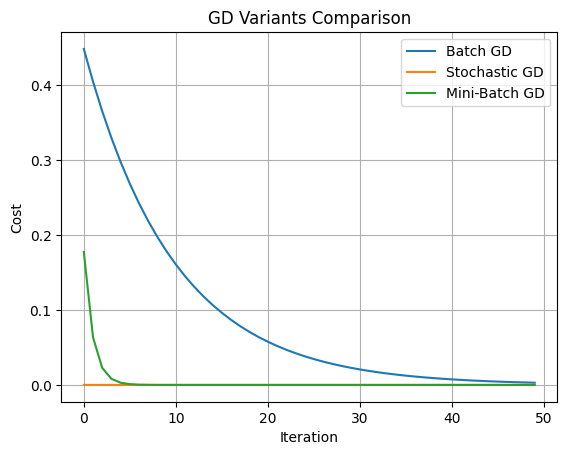

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Replace with actual paths
x_path = 'linearX.csv'
y_path = 'linearY.csv'

# Load X and Y from separate files
x = pd.read_csv(x_path, header=None).values.flatten()
y = pd.read_csv(y_path, header=None).values.flatten()

# Normalize the predictor
x = (x - np.mean(x)) / np.std(x)

# Reshape x and y for matrix operations
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
m = len(y)

# Add intercept term
X = np.hstack((np.ones((m, 1)), x))  # shape (m, 2)

# Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations, convergence_threshold=1e-6):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        predictions = X @ theta
        error = predictions - y
        gradients = (1/m) * X.T @ error
        theta = theta - learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Convergence check
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < convergence_threshold:
            print(f"Converged at iteration {i}")
            break

    return theta, cost_history

# Initial values
theta = np.zeros((2, 1))
learning_rate = 0.5
iterations = 50

# Train model using Batch Gradient Descent
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

print("Final Theta:", theta_final.flatten())
print("Final Cost:", cost_history[-1])

# 1. Plot cost function vs iteration
plt.figure(figsize=(8,5))
plt.plot(range(len(cost_history)), cost_history, label='Cost over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration (lr=0.5)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot data and fitted line
plt.figure(figsize=(8,5))
plt.scatter(x, y, label='Training Data')
plt.plot(x, X @ theta_final, color='red', label='Fitted Line')
plt.xlabel('Normalized X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

# 3. Try multiple learning rates
learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    theta = np.zeros((2, 1))
    theta_lr, cost_lr = gradient_descent(X, y, theta, lr, iterations)
    plt.plot(range(len(cost_lr)), cost_lr, label=f'lr={lr}')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

# 4. Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        for j in range(m):
            rand_index = np.random.randint(m)
            xi = X[rand_index:rand_index+1]
            yi = y[rand_index:rand_index+1]
            prediction = xi @ theta
            error = prediction - yi
            gradients = xi.T @ error
            theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# 5. Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, learning_rate, iterations, batch_size=10):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for j in range(0, m, batch_size):
            xi = X_shuffled[j:j+batch_size]
            yi = y_shuffled[j:j+batch_size]
            prediction = xi @ theta
            error = prediction - yi
            gradients = xi.T @ error / batch_size
            theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Choose suitable learning rate
lr = 0.05
theta = np.zeros((2, 1))

theta_batch, cost_batch = gradient_descent(X, y, theta.copy(), lr, 50)
theta_sgd, cost_sgd = stochastic_gradient_descent(X, y, theta.copy(), lr, 50)
theta_mbgd, cost_mbgd = mini_batch_gradient_descent(X, y, theta.copy(), lr, 50, batch_size=10)

# Plot comparison
plt.plot(cost_batch, label='Batch GD')
plt.plot(cost_sgd, label='Stochastic GD')
plt.plot(cost_mbgd, label='Mini-Batch GD')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('GD Variants Comparison')
plt.legend()
plt.grid(True)
plt.show()
